
<h1 align="center">Homework 2 - How do Taxis move in NYC?</h1>

<p>In this assignment we perform an analysis of Taxis in NYC. In particular, we Work on specific research questions (RQs) that may help Taxi drivers in planning their movements throughout the city and the Taxi's users to have hints about the convenience of enjoying this service.

For this purpose we use the open data of Taxi's trips in NYC. In order to answer to the RQs we take into account the data related to Yellow cab for the year 2018 for the month of January.</p>
<p>The yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.</p>

<h1>Exploratory Data Analysis</h1>


<h2>Libraries</h2>

Let's start importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from pandas import DataFrame, read_csv

pd.set_option("display.max_columns",10)

<h1>RQ1</h1>

[RQ1] In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

<h2>Load Datasets in CSV format</h2>
<p>We Download Yellow cabs data  from <a>"NYC Taxi & Limousine Commission"</a></p>
<p>Download the datasets 2018 January month	Yellow Dataset and save it to local files.</p>

In [2]:
Location_Jan = r"C:\Users\Personal\Desktop\ADM-2018-master\ADM-HW2\csv\yellow_tripdata_2018-01.csv"
Location_Feb = r"C:\Users\Personal\Desktop\ADM-2018-master\ADM-HW2\csv\yellow_tripdata_2018-02.csv"
Location_Mar = r"C:\Users\Personal\Desktop\ADM-2018-master\ADM-HW2\csv\yellow_tripdata_2018-03.csv"
Location_Apr = r"C:\Users\Personal\Desktop\ADM-2018-master\ADM-HW2\csv\yellow_tripdata_2018-04.csv"
Location_May = r"C:\Users\Personal\Desktop\ADM-2018-master\ADM-HW2\csv\yellow_tripdata_2018-05.csv"
Location_Jun = r"C:\Users\Personal\Desktop\ADM-2018-master\ADM-HW2\csv\yellow_tripdata_2018-06.csv"

nytaxi = pd.read_csv(Location_Jan, usecols=[1,2,3,4,7,8,9,10,16]) 
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Feb, usecols=[1,2,3,4,7,8,9,10,16])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Mar, usecols=[1,2,3,4,7,8,9,10,16])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Apr, usecols=[1,2,3,4,7,8,9,10,16])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_May, usecols=[1,2,3,4,7,8,9,10,16])])
nytaxi = pd.concat([nytaxi, pd.read_csv(Location_Jun, usecols=[1,2,3,4,7,8,9,10,16])])
nytaxi.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
0,2018-01-01 11:22:49,2018-01-01 11:44:52,2,9.0,7,88,2,28.0,28.80
1,2018-01-01 11:53:13,2018-01-01 12:03:26,2,2.9,261,164,2,11.0,11.80
2,2018-01-01 11:02:02,2018-01-01 11:06:12,2,0.5,237,163,1,5.0,7.25
3,2018-01-01 11:13:44,2018-01-01 11:23:48,2,1.5,163,246,2,8.5,9.30
4,2018-01-01 11:33:51,2018-01-01 11:44:12,4,2.8,48,249,2,10.5,11.30


<p>In order to do the analysis by borough we need to combine the Yellow cabs data with the dataset we download the file from Taxi Zone Maps and Lookup Tables (taxi_zone_lookup.csv) </p>

<p>We decide to use the pick up zone as reference for the borough</p>

In [4]:
Location_taxi_zone =r"C:\Users\Personal\Desktop\ADM-2018-master\ADM-HW2\csv\taxi _zone_lookup.csv" 
nyBorough =pd.read_csv(Location_taxi_zone, usecols=[0,1])
df_full = nytaxi.join(nyBorough.set_index('LocationID'), on='PULocationID')
df_full.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,Borough
0,2018-01-01 11:22:49,2018-01-01 11:44:52,2,9.0,7,88,2,28.0,28.80,Queens
1,2018-01-01 11:53:13,2018-01-01 12:03:26,2,2.9,261,164,2,11.0,11.80,Manhattan
2,2018-01-01 11:02:02,2018-01-01 11:06:12,2,0.5,237,163,1,5.0,7.25,Manhattan
3,2018-01-01 11:13:44,2018-01-01 11:23:48,2,1.5,163,246,2,8.5,9.30,Manhattan
4,2018-01-01 11:33:51,2018-01-01 11:44:12,4,2.8,48,249,2,10.5,11.30,Manhattan


In order to make calculations with dates, we need to convert the column 'tpep_pickup_datetime' type to 'datetime'

In [5]:
df_full.tpep_pickup_datetime = pd.to_datetime(df_full.tpep_pickup_datetime)
df_full.tpep_dropoff_datetime = pd.to_datetime(df_full.tpep_dropoff_datetime)

We need to be sure that we are watching the right data. Thus, we remove all the trips that are not referring to 2018 and to months from January to June

In [6]:
df_full = df_full[df_full.tpep_pickup_datetime.dt.year > 2017]
df_full = df_full[df_full.tpep_pickup_datetime.dt.year < 2019]
df_full = df_full[df_full.tpep_pickup_datetime.dt.month < 7]

We can now calculate the number of trips by month and by borough

In [7]:
df_grouped = df_full.groupby([df_full.tpep_pickup_datetime.dt.month,'Borough'])['PULocationID'].count()/30
df_grouped = df_grouped.unstack()
df_grouped

Borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
tpep_pickup_datetime,,,,,,,
1,17.666667,195.8,2.3,17731.833333,1614.666667,0.166667,437.166667


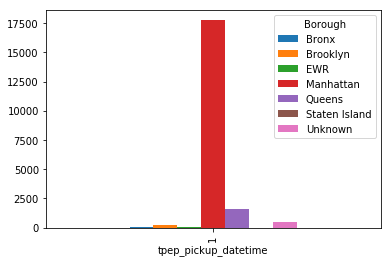

In [8]:
df_grouped.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7D723AD68>,
      dtype=object)

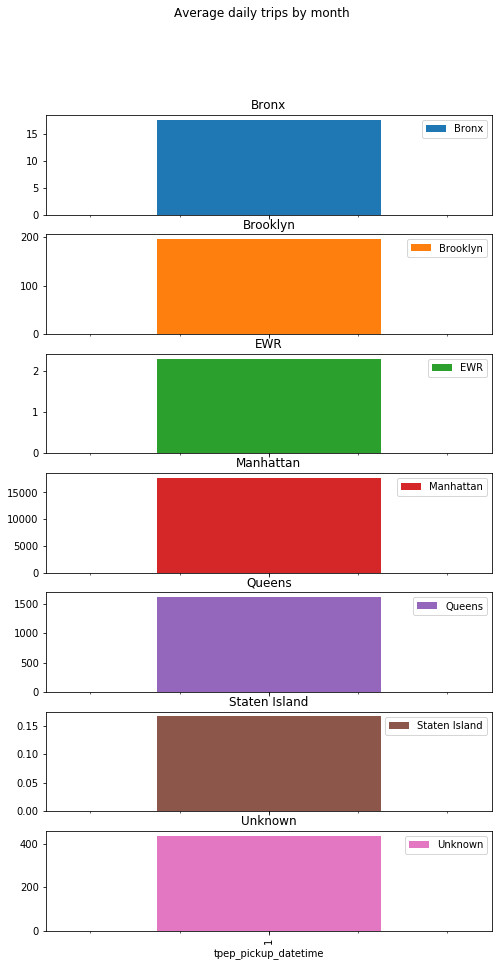

In [9]:
df_grouped.plot.bar(subplots=True, figsize=(8,15), title='Average daily trips by month')

## Comments

Manhattan has the biggest montly average taxis trips. This because Manhattan is New York's economic and administrative center. This borough, reading on Wikipedia, is often described as the cultural, financial, media, and entertainment capital of the world. Another explanation could be that in the other boroughs green taxis maybe more used.

Staten Island has the smallest monthly average taxis trips. A possible reading-key is that in this borough there's a ferry that connects Staten island with Manhattan. Ferry's ticket is free and there are two races at hours.

March is the month with the highest number of trips in general, mainly due to the high volume in Manhattan. But for Bronx and Queens, the biggest month is May.



<h1>RQ2</h1>

[RQ2] What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

In [10]:
df_grouped = df_full.groupby([df_full.tpep_pickup_datetime.dt.hour,'Borough'])['passenger_count'].sum()
# group by hour of the day and borough, and count trips
df_grouped = df_grouped.unstack()
df_grouped.head()

Borough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
tpep_pickup_datetime,,,,,,,
0,21.0,216.0,NaN,10292.0,2638.0,NaN,265.0
1,6.0,142.0,NaN,5670.0,1024.0,NaN,162.0
2,15.0,102.0,NaN,3775.0,490.0,NaN,100.0
3,6.0,74.0,NaN,2934.0,313.0,2.0,58.0
4,12.0,96.0,NaN,3561.0,484.0,1.0,91.0


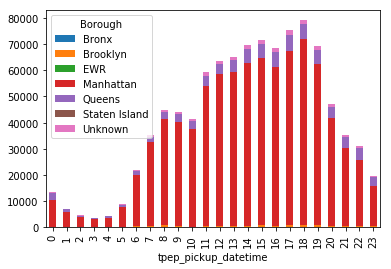

In [11]:
df_grouped.plot.bar(stacked=True);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7D7FD7BE0>,
      dtype=object)

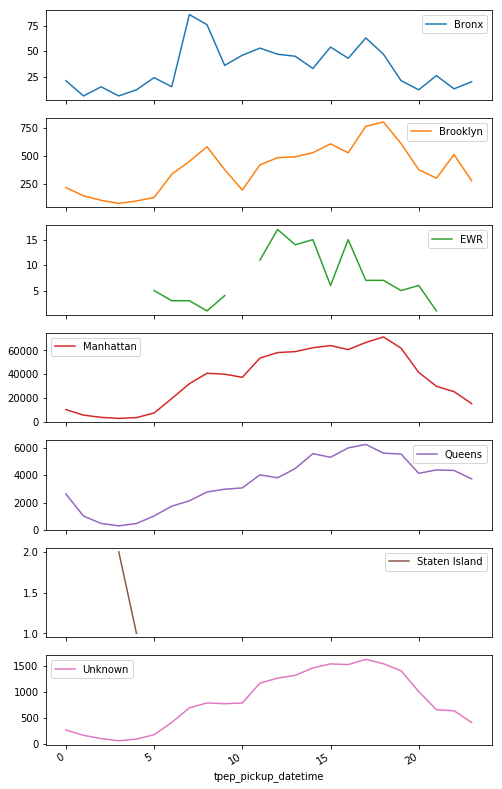

In [12]:
df_grouped.plot(subplots=True,figsize=(8,15))

## Comments

Most of the trips start between 18:00 and 19:00, time when workers go home or tourists go out for dinner.

Brooklyn (and Bronx) has a peak early in the morning, probably people that go to work, and late in the evening, maybe people that go back home after the night out.

EWR has peak around 15:00, maybe due to many plane arrivals.

<h1>RQ3</h1>

[RQ3] Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

<p>We put our attention on the distribution of trip's duration in this research question</p>

<p>Let's create a new column called trip duration</p>

In [13]:
df_full['trip_duration'] = (df_full.tpep_dropoff_datetime - df_full.tpep_pickup_datetime).dt.total_seconds()
df_full.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,...,payment_type,fare_amount,total_amount,Borough,trip_duration
0,2018-01-01 11:22:49,2018-01-01 11:44:52,2,9.0,7,...,2,28.0,28.80,Queens,1323.0
1,2018-01-01 11:53:13,2018-01-01 12:03:26,2,2.9,261,...,2,11.0,11.80,Manhattan,613.0
2,2018-01-01 11:02:02,2018-01-01 11:06:12,2,0.5,237,...,1,5.0,7.25,Manhattan,250.0
3,2018-01-01 11:13:44,2018-01-01 11:23:48,2,1.5,163,...,2,8.5,9.30,Manhattan,604.0
4,2018-01-01 11:33:51,2018-01-01 11:44:12,4,2.8,48,...,2,10.5,11.30,Manhattan,621.0


Let's describe the new feature

In [14]:
df_full.trip_duration.describe()

count    599988.000000
mean        921.837310
std        3895.941421
min     -342695.000000
25%         342.000000
50%         571.000000
75%         946.000000
max       86380.000000
Name: trip_duration, dtype: float64

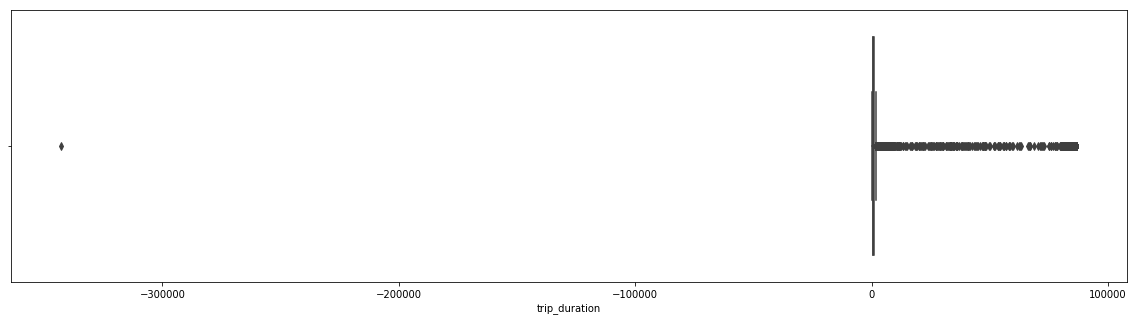

In [15]:
plt.figure(figsize = (20,5))
sns.boxplot(df_full['trip_duration'])
plt.show()

There are some outliers, especially some trips that have duration less than 0 seconds. Let's remove them.

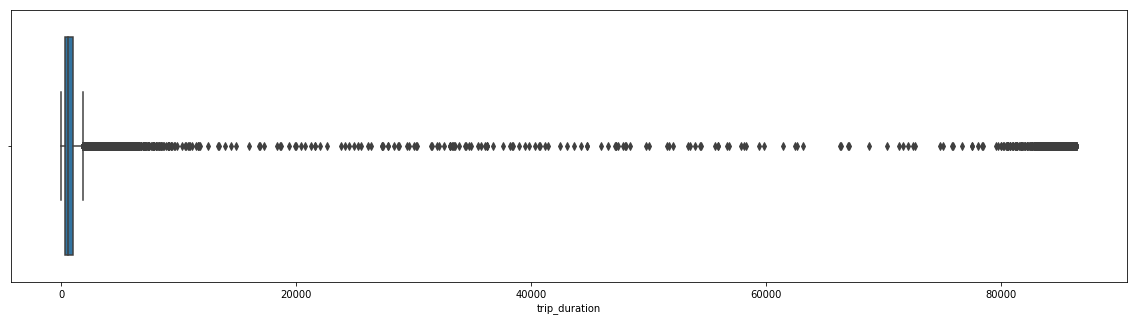

In [16]:
df_full = df_full[df_full.trip_duration > 0]
plt.figure(figsize = (20,5))
sns.boxplot(df_full['trip_duration'])
plt.show()

Let's remove all the trips with duration > 100000

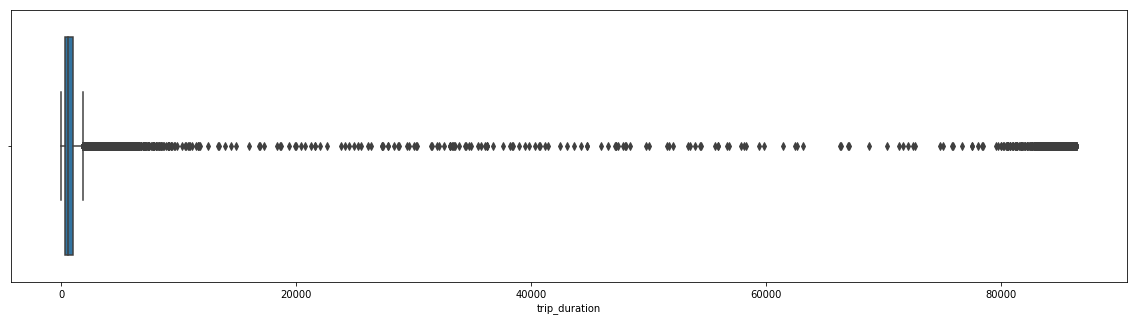

In [17]:
df_full = df_full.drop(df_full[(df_full.trip_duration > 100000)].index)
plt.figure(figsize = (20,5))
sns.boxplot(df_full['trip_duration'])
plt.show()

Let's investigate the specific boroughs

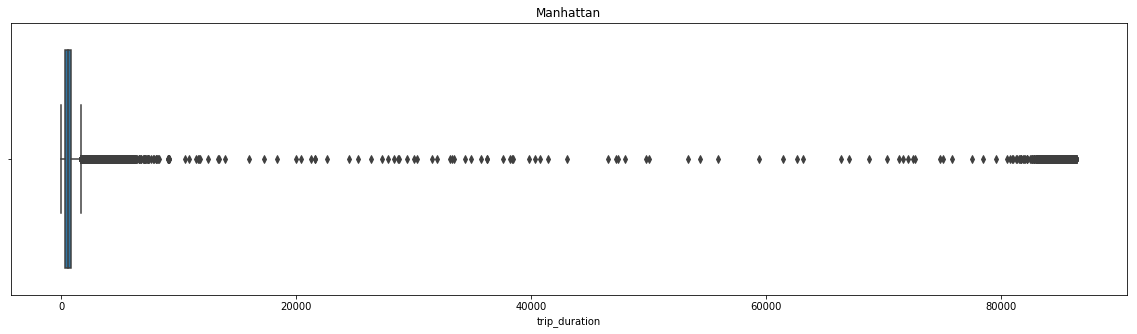

In [18]:
plt.figure(figsize = (20,5))
sns.boxplot(df_full[df_full.Borough == 'Manhattan'].trip_duration).set_title('Manhattan')
plt.show()    #Manhattan Trip Duration

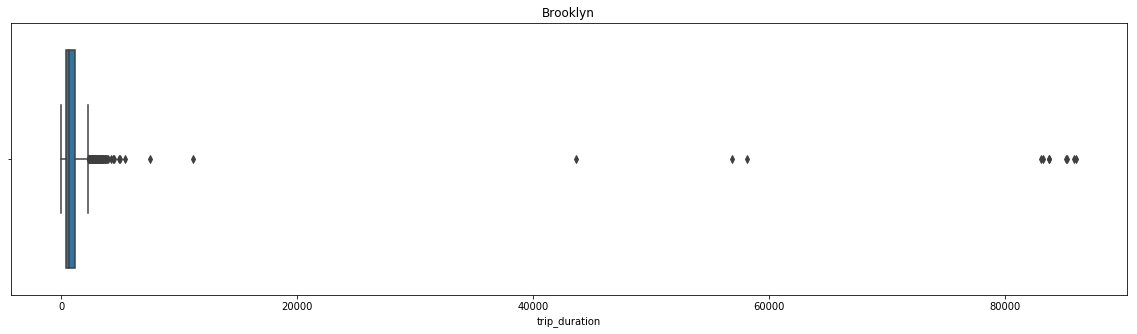

In [19]:
plt.figure(figsize = (20,5))
sns.boxplot(df_full[df_full.Borough == 'Brooklyn'].trip_duration).set_title('Brooklyn')
plt.show()    #Brooklyn Trip Duration

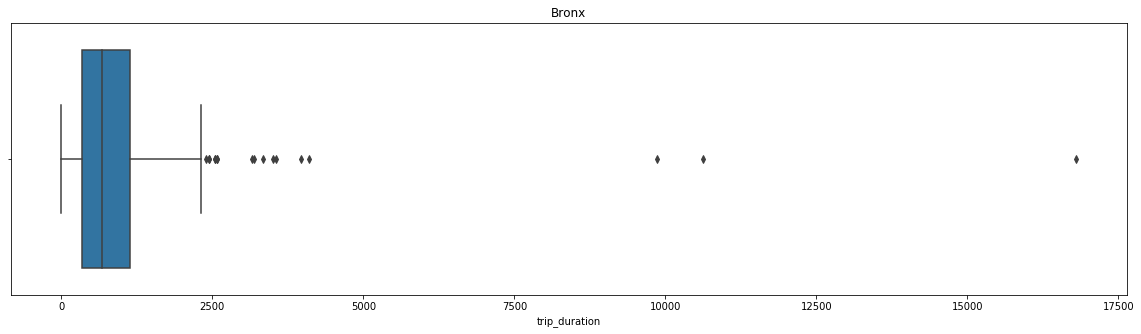

In [20]:
plt.figure(figsize = (20,5))
sns.boxplot(df_full[df_full.Borough == 'Bronx'].trip_duration).set_title('Bronx')
plt.show()         #Bronx Trip Duration

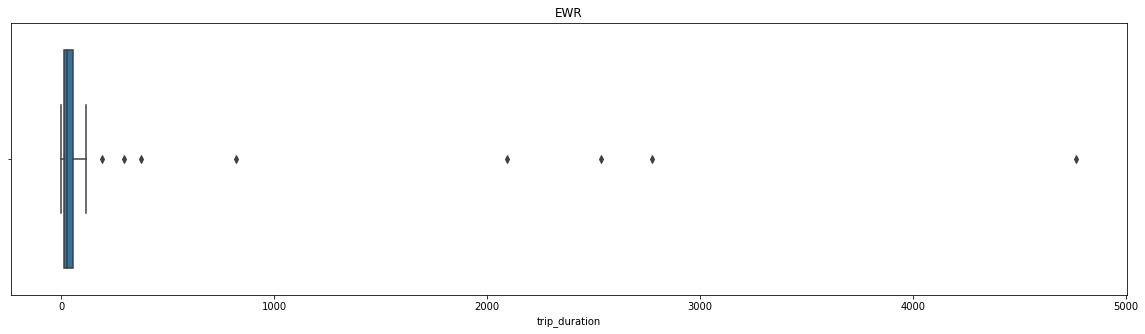

In [21]:
plt.figure(figsize = (20,5))
sns.boxplot(df_full[df_full.Borough == 'EWR'].trip_duration).set_title('EWR')
plt.show()        #EWR Trip Duration

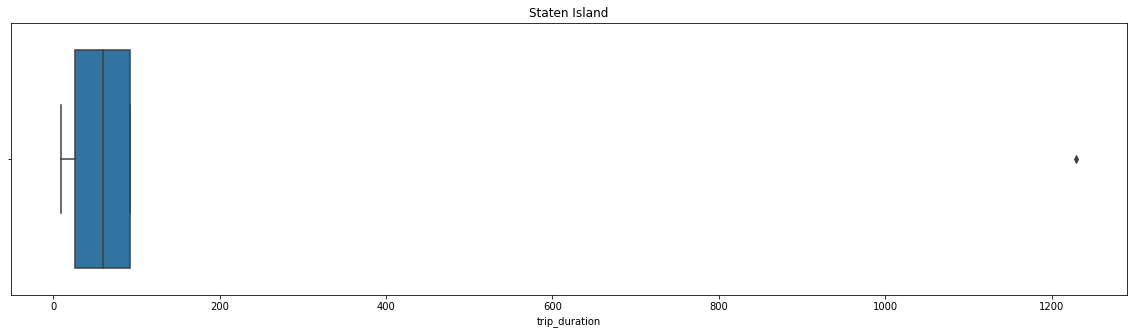

In [22]:
plt.figure(figsize = (20,5))
sns.boxplot(df_full[df_full.Borough == 'Staten Island'].trip_duration).set_title('Staten Island')
plt.show()           #Staten Island Trip Duration

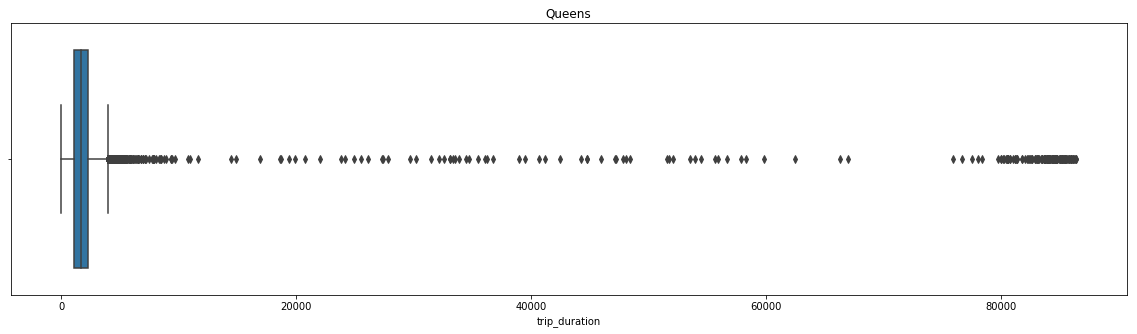

In [23]:
plt.figure(figsize = (20,5))
sns.boxplot(df_full[df_full.Borough == 'Queens'].trip_duration).set_title('Queens')
plt.show()         #Queens Trip Duration

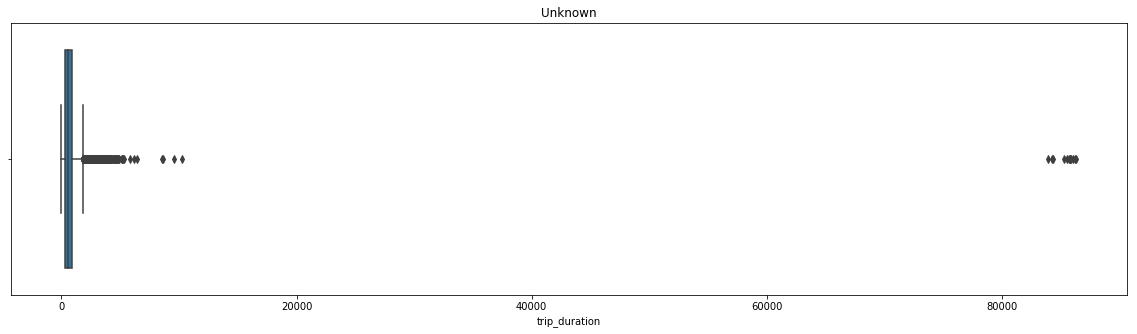

In [24]:
plt.figure(figsize = (20,5))
sns.boxplot(df_full[df_full.Borough == 'Unknown'].trip_duration).set_title('Unknown')
plt.show()         # Unknown borough Trip Duration

Queens is the borough with the higher 'trip_duration' average, so we will use it as a reference to identify outliers on the whole dataset.

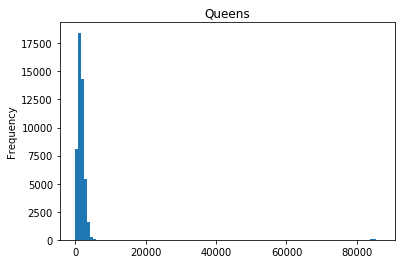

In [25]:
df_full[df_full.Borough == 'Queens'].trip_duration.plot.hist(bins=100, title="Queens")

Let's remove all the trips lasting more than 20000 seconds

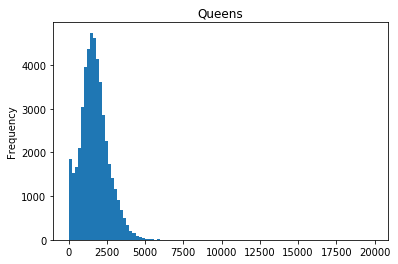

In [26]:
df_clean = df_full # We clone the dataframe to keep the original in memory

df_clean = df_clean[df_clean.trip_duration < 20000]

df_clean[df_clean.Borough == 'Queens'].trip_duration.plot.hist(bins=100, title="Queens")

We can do a cut at 7500

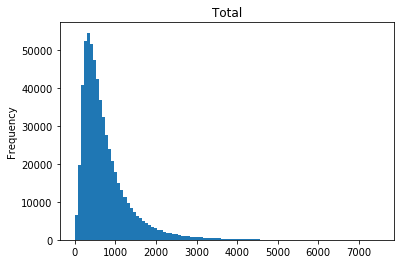

In [27]:
df_clean = df_clean[df_clean.trip_duration < 7500]

df_clean.trip_duration.plot.hist(bins=100, title="Total")

<h1>RQ4</h1>

[RQ4] What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.

Let's start from checking which is the most common payment type.

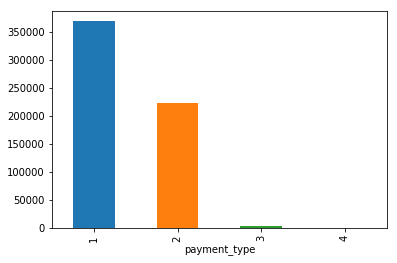

In [28]:
df_grouped = df_clean.groupby('payment_type')['Borough'].count()
df_grouped.head()

df_grouped.plot.bar()

Now let's check how the payment types are distributed over the boroughs.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7DA344828>,
      dtype=object)

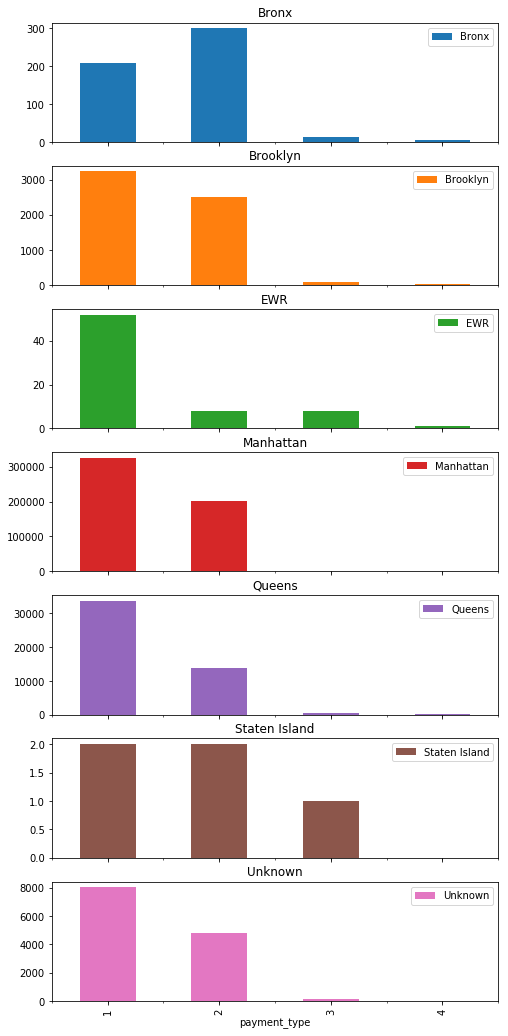

In [29]:
df_grouped = df_clean.groupby(['payment_type','Borough'])['Borough'].count() # group by payment type and borough
df_grouped = df_grouped.unstack()
df_grouped.columns = ['Bronx','Brooklyn','EWR','Manhattan','Queens','Staten Island', 'Unknown']
df_grouped.plot(subplots=True,figsize=(8,18),kind='bar') # Plot everything

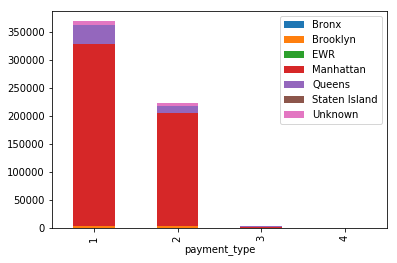

In [30]:
df_grouped.plot.bar(stacked=True)

In order to check if the type of payment is related to the borough, we can execute a Chi2 test.

H0: There's not correlation between payment type and borough

H1: There's correlation between payment type and borough

In [31]:
stats.chi2_contingency(df_grouped)

C:\Users\Personal\Anaconda3\lib\site-packages\scipy\stats\contingency.py:242: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):
C:\Users\Personal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Personal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Personal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


(nan, nan, 18, array([[nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan]]))

### Conclusions

The firt value is chi squared value (71769.52), followed by the p-value (0.0.0), then comes the degrees of freedom (18).

We can reject the null hypothesis if the p-value is less than 0.05.

Moreover, from chi squared table it's possible to see that with 18 degrees of freedom we must reject null hypothesis with chi squared value upper than 28.87

For this reasons we accept null hypothesis: there's correlation between borough and type of payment 

<h1>RQ5</h1>

[RQ5] Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

Let's do an heatmap to see the global distribution

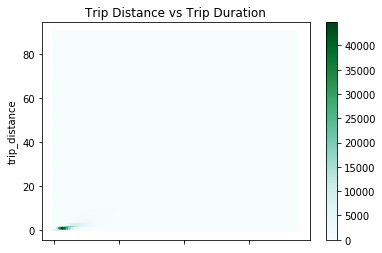

In [32]:
df_clean.plot.hexbin(x='trip_duration', y='trip_distance', title="Trip Distance vs Trip Duration")

The plot is not balanced, it is too concentrated in the zone close to the zero.

There are some outliers. Let's remove trips with trip distance > 25000.

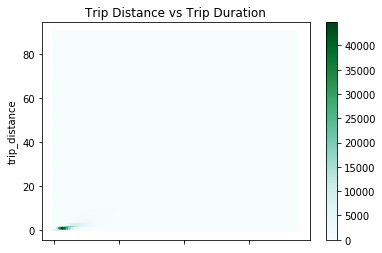

In [33]:
df_clean = df_clean.drop(df_clean[(df_clean.trip_distance > 25000)].index)
df_clean.plot.hexbin(x='trip_duration', y='trip_distance', title="Trip Distance vs Trip Duration")

Still too many outliers. We remove trips with 'trip_distance' > 400

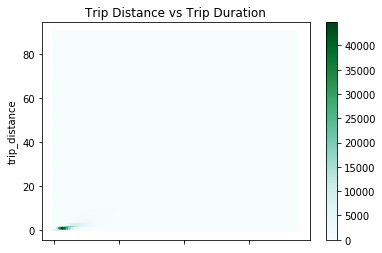

In [34]:
df_clean = df_clean.drop(df_clean[(df_clean.trip_distance > 400)].index)
df_clean.plot.hexbin(x='trip_duration', y='trip_distance', title="Trip Distance vs Trip Duration")

In order to clean the data, let's plot the trip_distance distribution

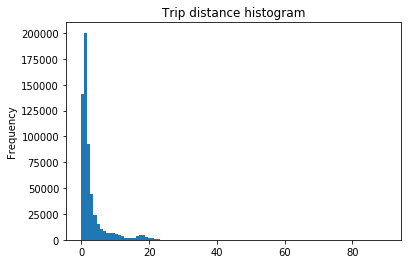

In [35]:
df_clean.trip_distance.plot.hist(bins=100, title="Trip distance histogram")

Let's do a first cut at 'trip_distance' = 50

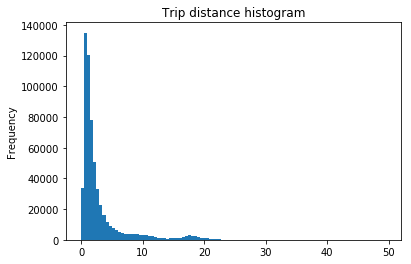

In [36]:
df_clean = df_clean.drop(df_clean[(df_clean.trip_distance > 50)].index)
df_clean.trip_distance.plot.hist(bins=100, title="Trip distance histogram")

We want to clean more, but in order to do this, let's check which is the borough with the highest mean trip distance

In [37]:
df_grouped = df_clean.groupby('Borough')['trip_distance'].mean()
df_grouped

Borough
Bronx             3.616769
Brooklyn          3.383085
EWR               2.554348
Manhattan         2.211838
Queens           11.514895
Staten Island     4.560000
Unknown           2.782144
Name: trip_distance, dtype: float64

Queens has the highest mean trip average (11.12). Let's see the distribution in this borough.

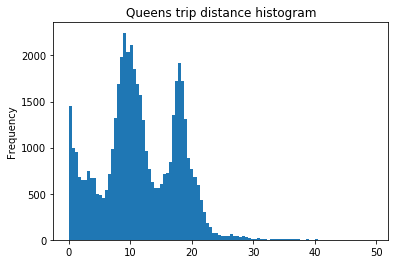

In [38]:
df_clean[df_clean.Borough == 'Queens'].trip_distance.plot.hist(bins=100, title="Queens trip distance histogram")

It's reasonable to cut out all the trips with 'trip_distance' higher than 35.

Let's see the new heatmap plot

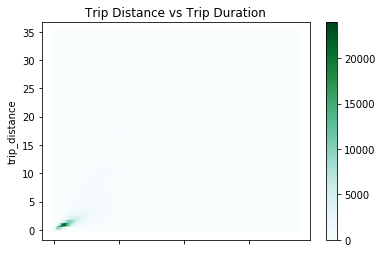

In [39]:
df_clean = df_clean.drop(df_clean[(df_clean.trip_distance > 35)].index)
df_clean.plot.hexbin(x='trip_duration', y='trip_distance', title="Trip Distance vs Trip Duration")

The plot is still not clear, although there seems to be a linear correlation. Let's investigate the heatmaps for each Borough

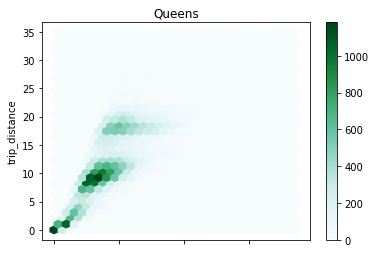

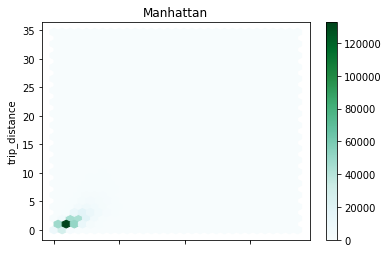

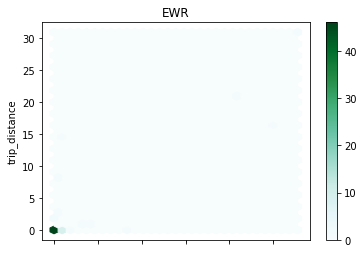

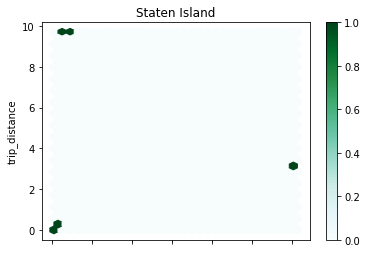

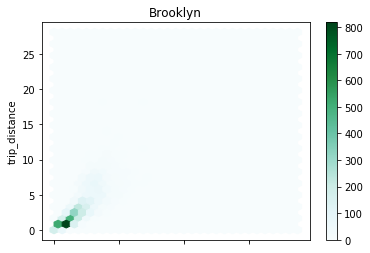

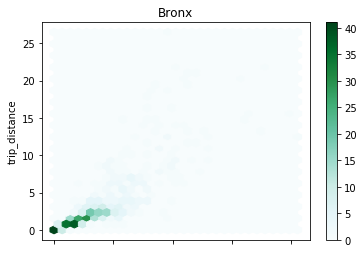

In [40]:
df_clean[df_clean.Borough == 'Queens'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Queens')
df_clean[df_clean.Borough == 'Manhattan'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Manhattan')
df_clean[df_clean.Borough == 'EWR'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='EWR')
df_clean[df_clean.Borough == 'Staten Island'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Staten Island')
df_clean[df_clean.Borough == 'Brooklyn'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Brooklyn')
df_clean[df_clean.Borough == 'Bronx'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Bronx')

Queens is the borough with the mean trip_distance higher
But there is also a strange concentration of trip lasting only few seconds
Let's plot the distribution of the duration for Queens

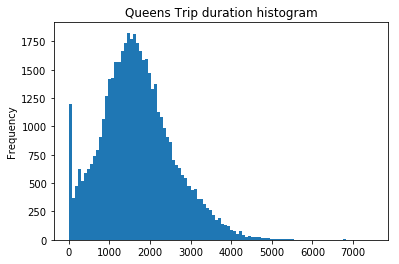

In [41]:
df_clean[df_clean.Borough == 'Queens'].trip_duration.plot.hist(bins=100, title="Queens Trip duration histogram")

There's a strange concentration of trips that last less than a minute. Let's remove them because they are not relevant in volume.

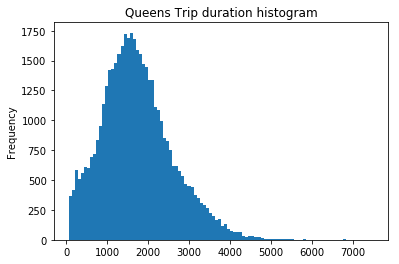

In [42]:
df_clean = df_clean.drop(df_clean[(df_clean.trip_duration < 60)].index)
df_clean[df_clean.Borough == 'Queens'].trip_duration.plot.hist(bins = 100, title="Queens Trip duration histogram")

Let's replot everything with new scales

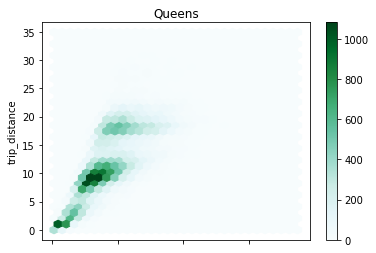

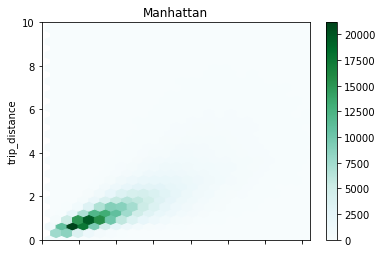

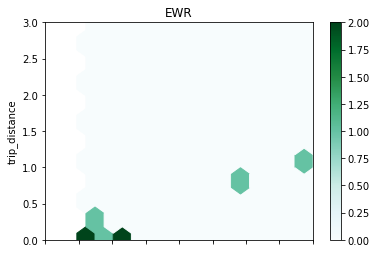

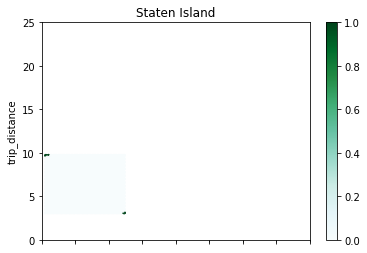

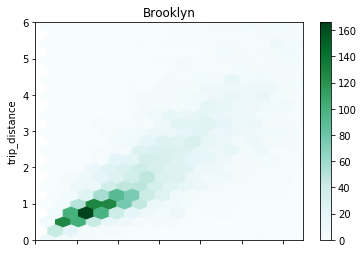

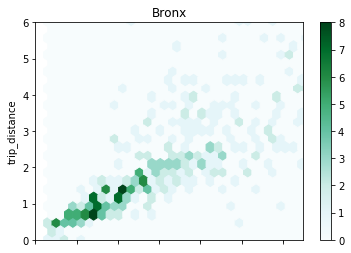

In [43]:
df_clean[df_clean.Borough == 'Queens'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Queens')
df_clean[df_clean.Borough == 'Manhattan'].plot(kind='hexbin',x='trip_duration', y='trip_distance', title='Manhattan', xlim=(0,1800), ylim=(0,10))
df_clean[df_clean.Borough == 'EWR'].plot(kind='hexbin',x='trip_duration', y='trip_distance', title='EWR', xlim=(0,400), ylim=(0,3))
df_clean[df_clean.Borough == 'Staten Island'].plot(kind='hexbin',x='trip_duration', y='trip_distance',gridsize=30, title='Staten Island', xlim=(0,4000), ylim=(0,25))
df_clean[df_clean.Borough == 'Brooklyn'].plot(kind='hexbin',x='trip_duration', y='trip_distance', title='Brooklyn', xlim=(0,1300), ylim=(0,6))
df_clean[df_clean.Borough == 'Bronx'].plot(kind='hexbin',x='trip_duration', y='trip_distance', title='Bronx', xlim=(0,1300), ylim=(0,6))

In the EWR plot we see that data is pushed close to trip_distance = 0

Let's plot an histogram on EWR 'trip_distance' to better understand the behaviour

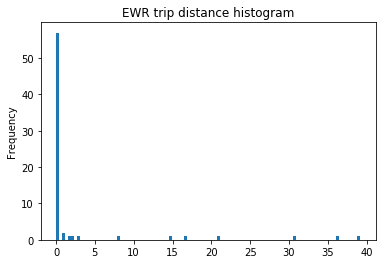

In [44]:
df_full[df_full.Borough == 'EWR'].trip_distance.plot.hist(bins=100, title="EWR trip distance histogram")


It's clear that almost all the trips have 'trip_distance' = 0.

We guess this is because trips to/from the airport have a <b>fixed tariff</b> thus the drivers do not register the trip distance but only the price.

Because of this, <b>we decide to remove all the trips starting from EWR</b>

In [45]:
df_clean = df_clean.drop(df_clean[(df_clean.Borough == "EWR")].index)

Now we can calculate the Pearson coefficient to check if there is correlation between 'trip_duration' and 'trip_distance'

In [46]:
df_clean['trip_duration'].corr(df_clean['trip_distance'])

0.8340275127671131

## Conclusions

Perason coefficient is very high, this means that, as expected, longer trips means more time in the taxi

<h1>CRQ1</h1>
<p>Does the fare for mile change across NY's borough? We want to discover whether the expenses of a user that enjoys Taxis in one zone is different from those that uses it in another one.

<ul>Considering the fare amount:

<li>Compute the price per mile equation for each trip.</li>
<li>Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?</li>
<li>Run the t-test among all the possible pairs of distribution of different boroughs.</li>
<li>Can you say that statistically significant differences, on the averages, hold among zones? In other words, are Taxis trip in some boroughs, on average, more expensive than others?</li>
The price per mile might depend on traffic the Taxi finds on its way. So we try to mitigate this effect:

<li>Likely, the duration of the trip says something about the city's congestion, especially if combined with the distances. It might be a good idea to weight the price for mile using the time equation needed to complete the trip. Thus, instead of equation, you can use equation, where equation is the time needed to complete the trip.</li>
<li>Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?</li>
<li>Run the t-test among all the possible pairs of new distribution of different boroughs.</li>
<li>Can you say that statistically significant differences, on the averages, hold among zones? In other words, are Taxis trip in some boroughs, on average, more expensive than others?</li>
Compare the results obtained for the price per mile and the weighted price for mile. What do you think about that?</ul></p>

<h2>Data exploration</h2>

We already made some cleanings according to the RQs. But let's go deeper.

Let's check the mean values for all the features by Borough


In [47]:
grouped_mean = df_clean.groupby(['Borough']).mean()
grouped_mean= grouped_mean.drop(['PULocationID','DOLocationID'], axis=1) # Remove not relevant columns
grouped_mean

,passenger_count,trip_distance,payment_type,fare_amount,total_amount,trip_duration
Borough,,,,,,
Bronx,1.560086,3.938906,1.613734,15.313305,17.521245,875.658798
Brooklyn,1.609698,3.466435,1.454895,13.802769,16.499722,840.554986
Manhattan,1.639390,2.219530,1.392269,10.279686,12.863400,661.837373
Queens,1.697403,11.707685,1.299479,35.219844,44.618200,1731.594748
Staten Island,1.000000,7.500000,1.666667,18.333333,25.656667,460.333333
Unknown,1.507698,2.910330,1.398494,12.513779,15.586227,739.414481


The following peculiarities are found:

<li>Queens has the highest average on 'trip_distance'</li>
<li>Staten Island has the highest 'fare_amount' average</li>
<li>Queens has the highest average 'trip_duration'</li>

<h2>'trip_distance'</h2>

Accordin to RQ5, we decided to cut out trip with 'trip_distance' < 0 and > 35.

This is the final histogram:

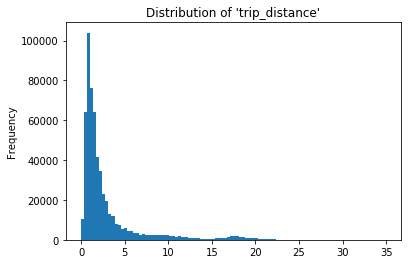

In [48]:
df_clean['trip_distance'].plot.hist(bins=100, title="Distribution of 'trip_distance'")

<h1>'total_amount'</h1>

Analysing the NYC Taxi Information document, we found out that there is a minimum fare of 2.5$. Thus, we can remove trips with 'total_amount' < 2.50 .

In [49]:
df_clean = df_clean.drop(df_clean[df_clean.total_amount < 2.5].index)

<h2>'fare_amount</h2>

Now it's time to investigate the feature 'fare_amount'

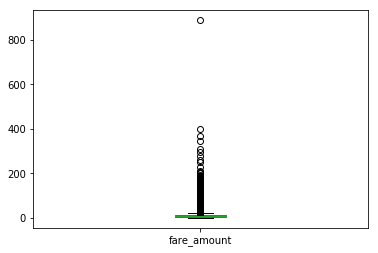

In [50]:
df_clean['fare_amount'].plot.box()

We can clearly see two outliers staind at around 200000. We cut them out together with the values below or equal to zero

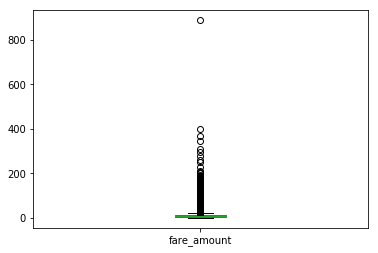

In [51]:
df_clean = df_clean.drop(df_clean[df_clean.fare_amount <= 0].index) # remove rows with fare_amount <= 0
df_clean = df_clean.drop(df_clean[df_clean.fare_amount > 25000].index) # remove rows with fare_amount > 25000
df_clean['fare_amount'].plot.box()

We see other outliers above 2000, we can remove them

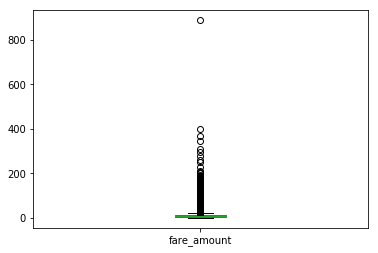

In [52]:
df_clean = df_clean.drop(df_clean[df_clean.fare_amount > 2000].index) # remove rows with fare_amount > 2000
df_clean['fare_amount'].plot.box()

We do another cut at 500

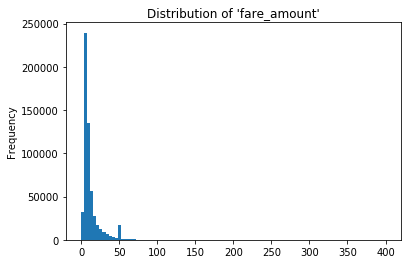

In [53]:
df_clean = df_clean.drop(df_clean[df_clean.fare_amount > 500].index) # remove rows with fare_amount > 500
df_clean['fare_amount'].plot.hist(bins=100, title="Distribution of 'fare_amount'")

The plot is still unbalanced, we do another cut at 150

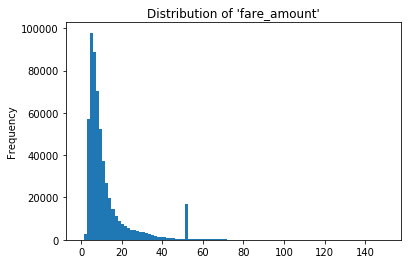

In [54]:
df_clean = df_clean.drop(df_clean[df_clean.fare_amount > 150].index)
df_clean['fare_amount'].plot.hist(bins=100, title="Distribution of 'fare_amount'")

Staten Island is the Borough with the highes fare amount, let's check its distribution

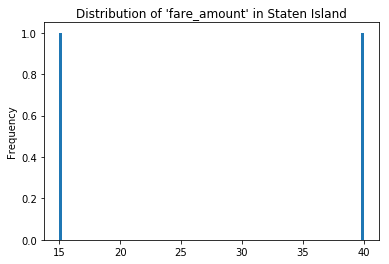

In [55]:
df_clean[df_clean.Borough == 'Staten Island'].fare_amount.plot.hist(bins = 100, title="Distribution of 'fare_amount' in Staten Island")

From this plot we can see that the distribution is almost null after 110. Thus we can cut there without risking to remove important data

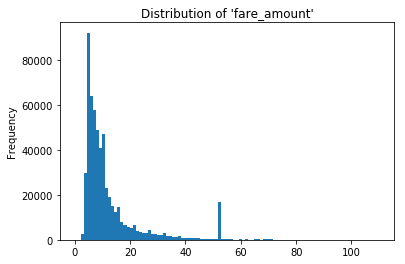

In [56]:
df_clean = df_clean.drop(df_clean[df_clean.fare_amount > 110].index) # remove rows with fare_amount > 110
df_clean['fare_amount'].plot.hist(bins=100, title="Distribution of 'fare_amount'")

There's a peak of 'fare_amount' between 45 and 48 that could deserve a specific analysis.

<h1>'trip_duration'</h1>

In RQ5 we decided to cut out trips with 'trip_duration' < 60 and > 7500. This is the final histogram.

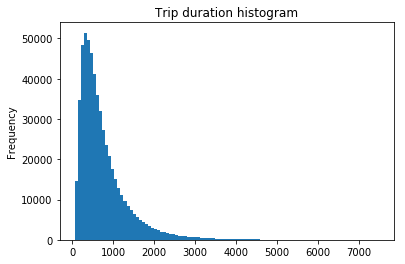

In [57]:
df_clean.trip_duration.plot.hist(bins=100, title="Trip duration histogram")

At this point we can consider most of the outliers removed.

<h2>Dealing with 'Unknown' borough</h2>

In the dataset we have many rows with 'Unknown' borough. We want to try to re-allocate the trips to the borough with the closest behaviour.

Let's recalculate the means and the stds for the boroughs.

In [58]:
grouped_mean = df_clean.groupby(['Borough']).mean()
grouped_mean = grouped_mean.drop(['PULocationID','DOLocationID'],axis=1) # Remove not relevant columns
grouped_mean

,passenger_count,trip_distance,payment_type,fare_amount,total_amount,trip_duration
Borough,,,,,,
Bronx,1.558442,3.859091,1.614719,14.721861,16.899221,869.863636
Brooklyn,1.608832,3.468688,1.452806,13.816762,16.521255,839.490524
Manhattan,1.639146,2.218661,1.391537,10.275907,12.859923,661.808264
Queens,1.698820,11.683500,1.299094,35.034939,44.412755,1729.520127
Staten Island,1.000000,6.400000,1.000000,27.500000,32.575000,644.500000
Unknown,1.508519,2.911749,1.396746,12.257643,15.318889,740.797240


According to the means, trips from 'Unknown' seems to be similar to the trips from 'Manhattan'.

Let's compare the distributions of the features in these two boroughs in order to have some more valid proof.

In [59]:
unknown = df_clean[df_clean.Borough == "Unknown"] # Select all trips from Unknown
manhattan = df_clean[df_clean.Borough == "Manhattan"] # Select all trips from Manhattan

This is the 'trip_distance' distribution comparison using a normalized histogram.

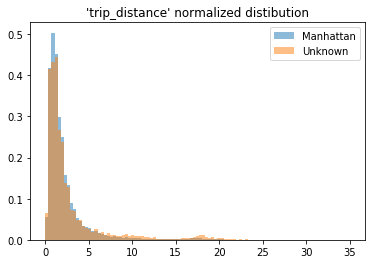

In [60]:
bins = pd.np.linspace(0, 35, 100)

plt.hist(manhattan.trip_distance, bins, alpha=0.5, label='Manhattan', density=True)
plt.hist(unknown.trip_distance, bins, alpha=0.5, label='Unknown', density=True)
plt.legend(loc='upper right')
plt.title('\'trip_distance\' normalized distibution')
plt.show()


This is the 'trip_duration' distribution comparison using a normalized histogram.

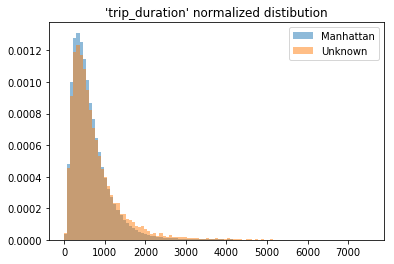

In [61]:
bins = pd.np.linspace(0, 7500, 100)

plt.hist(manhattan.trip_duration, bins, alpha=0.5, label='Manhattan', density=True)
plt.hist(unknown.trip_duration, bins, alpha=0.5, label='Unknown', density=True)
plt.legend(loc='upper right')
plt.title('\'trip_duration\' normalized distibution')
plt.show()

This is the 'fare_amount' distribution comparison using a normalized histogram

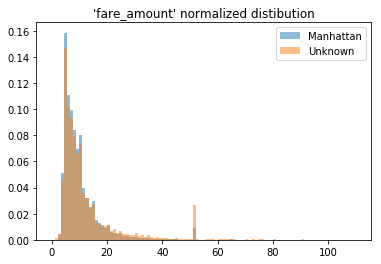

In [62]:
bins = pd.np.linspace(0, 110, 100)

plt.hist(manhattan.fare_amount, bins, alpha=0.5, label='Manhattan', density=True)
plt.hist(unknown.fare_amount, bins, alpha=0.5, label='Unknown', density=True)
plt.legend(loc='upper right')
plt.title('\'fare_amount\' normalized distibution')
plt.show()

In all the three previouses plots, the features showed pratically the same trend between 'Unknown' and 'Manhattan'.

But, just to be sure, we decide to run also t-tests between the two sets.

In this case:

<li>H0: the boroughs are statistically the same</li>
<li>H1: the boroughs are statistically different</li>

In [63]:
stats.ttest_ind(manhattan['trip_distance'], unknown['trip_distance'])

Ttest_indResult(statistic=-27.623327079343344, pvalue=7.750108335648597e-168)

In [64]:
stats.ttest_ind(manhattan['trip_duration'], unknown['trip_duration'])

Ttest_indResult(statistic=-16.984465726305395, pvalue=1.1146772748394843e-64)

In [65]:
stats.ttest_ind(manhattan['fare_amount'], unknown['fare_amount'])

Ttest_indResult(statistic=-26.31092578089863, pvalue=1.815838200824813e-152)

Contrary than expected, we found no statistic evidence that 'Unknown' and 'Manhattan' are correlated, because p-value is 0 in all the tests.

Thus, we remove from the dataset all the trips coming from Unknown borough.

In [66]:
df_clean = df_clean.drop(df_clean[df_clean.Borough == 'Unknown'].index)

At this point we can consider the dataset (mostly) clean and we can proceed with the analysis asked in CRQ1.

<h1>Does the fare for mile change across NY's borough?</h1>

In order to give an answer, we firstly need to create a new column called 'price_per_mile', filled with the ratio between the trip 'fare_amount' and 'trip_distance'.

In [67]:
df_clean['price_per_mile'] = df_clean.fare_amount / df_clean.trip_distance

Let's check the distribution of the new 'price_per_mile' feature

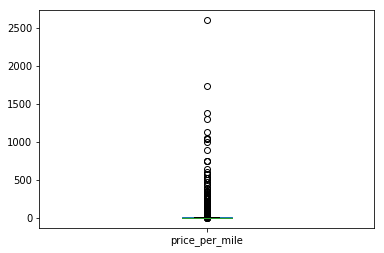

In [68]:
df_clean.price_per_mile.plot.box()

There are some outliers. We'll cut out all the trips with a too high and too low 'price_per_mile'

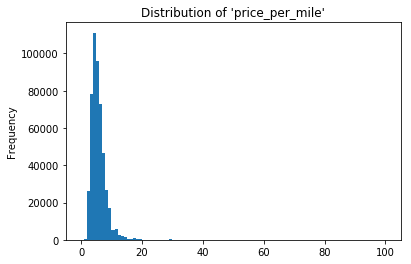

In [69]:
df_clean = df_clean.drop(df_clean[df_clean.price_per_mile > 100].index) # remove rows with 'price_per_mile' > 100

df_clean.price_per_mile.plot.hist(bins=100, title="Distribution of 'price_per_mile'")

We can still cut out outliers with 'price_per_mile' > 20

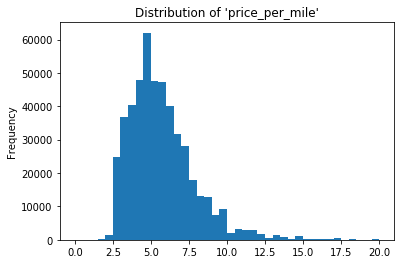

In [70]:
df_clean = df_clean.drop(df_clean[df_clean.price_per_mile > 20].index) # remove rows with 'price_per_mile' > 20

df_clean.price_per_mile.plot.hist(bins=40, title="Distribution of 'price_per_mile'")

Now that outliers are removed, we can recalculate the mean and the std for all the features.

In [71]:
grouped_mean = df_clean.groupby(['Borough']).mean()
grouped_mean = grouped_mean.drop(['PULocationID','DOLocationID'], axis=1)
grouped_mean

,passenger_count,trip_distance,payment_type,fare_amount,total_amount,trip_duration,price_per_mile
Borough,,,,,,,
Bronx,1.543641,3.807456,1.605985,14.538653,16.692643,856.194514,5.037307
Brooklyn,1.609562,3.490614,1.450619,13.805410,16.514074,844.663242,5.050035
Manhattan,1.639097,2.225000,1.390684,10.274167,12.856022,662.917921,5.966594
Queens,1.695517,11.741581,1.296211,35.086722,44.487030,1736.435994,3.307793
Staten Island,1.000000,3.100000,1.000000,15.000000,16.800000,1229.000000,4.838710


In [72]:
grouped_std = df_clean.groupby(['Borough']).std()
grouped_std = grouped_std.drop(['PULocationID','DOLocationID'], axis=1)
grouped_std

,passenger_count,trip_distance,payment_type,fare_amount,total_amount,trip_duration,price_per_mile
Borough,,,,,,,
Bronx,1.180557,4.116965,0.537926,11.386906,12.793209,624.340041,1.852610
Brooklyn,1.251258,3.293122,0.522686,9.765695,11.180176,598.406750,1.948405
Manhattan,1.276662,2.650216,0.501465,7.930773,9.751260,494.667403,2.159078
Queens,1.314730,5.877725,0.476779,15.341429,19.771587,853.939662,1.148011
Staten Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And if we plot the distributions of the various boroughs:

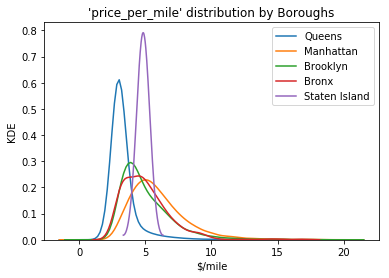

In [73]:
sns.kdeplot(df_clean.price_per_mile[df_clean.Borough == "Queens"],label='Queens', bw=0.5)
sns.kdeplot(df_clean.price_per_mile[df_clean.Borough == "Manhattan"],label='Manhattan', bw=0.5)
sns.kdeplot(df_clean.price_per_mile[df_clean.Borough == "Brooklyn"],label='Brooklyn', bw=0.5)
sns.kdeplot(df_clean.price_per_mile[df_clean.Borough == "Bronx"],label='Bronx', bw=0.5)
sns.kdeplot(df_clean.price_per_mile[df_clean.Borough == "Staten Island"],label='Staten Island', bw=0.5)

plt.xlabel('$/mile')
plt.ylabel('KDE')
plt.title('\'price_per_mile\' distribution by Boroughs')
plt.show()

Let's do a t-test on the 'price_per_mile' series

<li>H0: means are the same</li>
<li>H1: means are different</li>

Our p-value treshold is p-value = 0.05

In [74]:
ttest_matrix = pd.DataFrame(index=df_clean.Borough.unique(), columns=df_clean.Borough.unique())

for col1 in df_clean.Borough.unique():
    for col2 in df_clean.Borough.unique():
        ttest_matrix.loc[col1,col2] = stats.ttest_ind(df_clean[df_clean.Borough == col1]['price_per_mile'], df_clean[df_clean.Borough == col2]['price_per_mile']).pvalue
        if col1==col2:
            break
            
ttest_matrix = ttest_matrix.apply(pd.to_numeric)
ttest_matrix

C:\Users\Personal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Personal\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Personal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Personal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Personal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,Queens,Manhattan,Brooklyn,Bronx,Staten Island
Queens,1.000000e+00,NaN,NaN,NaN,NaN
Manhattan,0.000000e+00,1.000000e+00,NaN,NaN,NaN
Brooklyn,0.000000e+00,4.044958e-187,1.000000,NaN,NaN
Bronx,1.125516e-192,6.951475e-18,0.899654,1.0,NaN
Staten Island,NaN,NaN,NaN,NaN,NaN


We consider pvalue = 0.05 as a treshold to reject the H0. Pvalues higher than 0.05 mean that Boroughs have the same mean (we accept the H0) Pvalues lower than 0.05 mean that Boroughs have different mean (we reject the H0)

H0 is rejected for all the pairs.

Second part of CRQ1 asks us to adjust the price per mile taking in account the traffic.

This is done creating a new feature dividing 'price_per_mile' by 'trip_duration.

We create a new column with 'ppm_adj' with the adjusted price per mile.

In [75]:
df_clean['ppm_adj'] = df_clean.fare_amount/df_clean.trip_duration

df_clean.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,...,total_amount,Borough,trip_duration,price_per_mile,ppm_adj
0,2018-01-01 11:22:49,2018-01-01 11:44:52,2,9.0,7,...,28.80,Queens,1323.0,3.111111,0.021164
1,2018-01-01 11:53:13,2018-01-01 12:03:26,2,2.9,261,...,11.80,Manhattan,613.0,3.793103,0.017945
2,2018-01-01 11:02:02,2018-01-01 11:06:12,2,0.5,237,...,7.25,Manhattan,250.0,10.000000,0.020000
3,2018-01-01 11:13:44,2018-01-01 11:23:48,2,1.5,163,...,9.30,Manhattan,604.0,5.666667,0.014073
4,2018-01-01 11:33:51,2018-01-01 11:44:12,4,2.8,48,...,11.30,Manhattan,621.0,3.750000,0.016908


Let's plot the distribution of the new feature for each borough

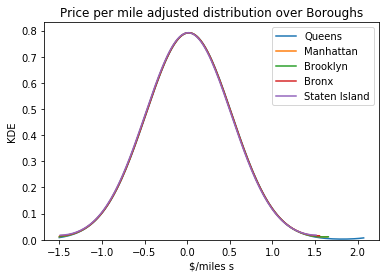

In [76]:
sns.kdeplot(df_clean.ppm_adj[df_clean.Borough == "Queens"],label='Queens', bw=0.5)
sns.kdeplot(df_clean.ppm_adj[df_clean.Borough == "Manhattan"],label='Manhattan', bw=0.5)
sns.kdeplot(df_clean.ppm_adj[df_clean.Borough == "Brooklyn"],label='Brooklyn', bw=0.5)
sns.kdeplot(df_clean.ppm_adj[df_clean.Borough == "Bronx"],label='Bronx', bw=0.5)
sns.kdeplot(df_clean.ppm_adj[df_clean.Borough == "Staten Island"],label='Staten Island', bw=0.5)

# beautifying the labels
plt.xlabel('$/miles s')
plt.ylabel('KDE')
plt.title('Price per mile adjusted distribution over Boroughs')
plt.show()

Now we can update the table with mean and std by borough adding the new columns

In [77]:
grouped_mean = df_clean.groupby(['Borough']).mean()
grouped_mean = grouped_mean.drop(['PULocationID','DOLocationID'], axis=1)
grouped_mean

,passenger_count,trip_distance,payment_type,fare_amount,total_amount,trip_duration,price_per_mile,ppm_adj
Borough,,,,,,,,
Bronx,1.543641,3.807456,1.605985,14.538653,16.692643,856.194514,5.037307,0.018091
Brooklyn,1.609562,3.490614,1.450619,13.805410,16.514074,844.663242,5.050035,0.017711
Manhattan,1.639097,2.225000,1.390684,10.274167,12.856022,662.917921,5.966594,0.016989
Queens,1.695517,11.741581,1.296211,35.086722,44.487030,1736.435994,3.307793,0.021295
Staten Island,1.000000,3.100000,1.000000,15.000000,16.800000,1229.000000,4.838710,0.012205


In [78]:
grouped_std = df_clean.groupby(['Borough']).std()
grouped_std = grouped_std.drop(['PULocationID','DOLocationID'], axis=1)
grouped_std

,passenger_count,trip_distance,payment_type,fare_amount,total_amount,trip_duration,price_per_mile,ppm_adj
Borough,,,,,,,,
Bronx,1.180557,4.116965,0.537926,11.386906,12.793209,624.340041,1.852610,0.005997
Brooklyn,1.251258,3.293122,0.522686,9.765695,11.180176,598.406750,1.948405,0.005976
Manhattan,1.276662,2.650216,0.501465,7.930773,9.751260,494.667403,2.159078,0.005101
Queens,1.314730,5.877725,0.476779,15.341429,19.771587,853.939662,1.148011,0.007377
Staten Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finally, we can perform a t-test over the new feature.

<li>H0: means are the same</li>
<li>H1: means are different</li>

P-value treshold is still pvalue = 0.05

In [79]:
ttest_matrix_adj = pd.DataFrame(index=df_clean.Borough.unique(), columns=df_clean.Borough.unique())

for col1 in df_clean.Borough.unique():
    for col2 in df_clean.Borough.unique():
        ttest_matrix_adj.loc[col1,col2] = stats.ttest_ind(df_clean[df_clean.Borough == col1]['ppm_adj'], df_clean[df_clean.Borough == col2]['ppm_adj']).pvalue
        if col1==col2:
            break

ttest_matrix_adj = ttest_matrix_adj.apply(pd.to_numeric)
ttest_matrix_adj

C:\Users\Personal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Personal\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Personal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Personal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Personal\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,Queens,Manhattan,Brooklyn,Bronx,Staten Island
Queens,1.000000e+00,NaN,NaN,NaN,NaN
Manhattan,0.000000e+00,1.000000e+00,NaN,NaN,NaN
Brooklyn,4.572943e-226,2.976684e-22,1.000000,NaN,NaN
Bronx,4.531510e-18,1.539045e-05,0.221504,1.0,NaN
Staten Island,NaN,NaN,NaN,NaN,NaN


We consider pvalue = 0.05 as a treshold to reject the H0. Pvalues higher than 0.05 mean that Boroughs have the same mean (we accept the H0) Pvalues lower than 0.05 mean that Boroughs have different mean (we reject the H0)

It happened that, again, all the boroughs have different means, so there are boroughs more expensive than others

<h1>CRQ2</h1>

Visualize Taxis movements! NYC is divided in many Taxis zones. For each yellow cab trip we know the zone the Taxi pick up and drop off the users. Let's visualize, on a chropleth map, the number of trips that starts in each zone. Than, do another map to count the races that end up in the single zone. Comment your discoveries.

<h2>Libraries</h2>

Let's start importing libraries

In [81]:
import folium 
from IPython.display import IFrame

<h2>Data preparation</h2>

Now we create two dataframes, one for the pickup and one for the drop off, with the count of the trips referring a specific zone

In [82]:
df_grouped_pu = df_clean.groupby(['PULocationID']).count()
df_grouped_pu = df_grouped_pu['Borough']
df_grouped_pu.head()

PULocationID
3      1
4    941
7    774
8      5
9      3
Name: Borough, dtype: int64

In [83]:
df_new_pu = pd.DataFrame({"Zone": range(1,264), "total": 0})
for i in range(1,264):
    if i in df_grouped_pu.index:
        df_new_pu.loc[i-1,'total'] = df_grouped_pu.loc[i]
        
df_new_pu.index += 1

df_new_pu.head()

,Zone,total
1,1,0
2,2,0
3,3,1
4,4,941
5,5,0


In [84]:
df_grouped_do = df_clean.groupby(['DOLocationID']).count()
df_grouped_do = df_grouped_do['Borough']
df_grouped_do.head()

DOLocationID
1    1162
3      39
4    2228
5       2
6       7
Name: Borough, dtype: int64

In [85]:
df_new_do = pd.DataFrame({"Zone": range(1,264), "total": 0})
for i in range(1,264):
    if i in df_grouped_do.index:
        df_new_do.loc[i-1,'total'] = df_grouped_do.loc[i]
        
df_new_do.index += 1

df_new_do.head()

,Zone,total
1,1,1162
2,2,0
3,3,39
4,4,2228
5,5,2


<h2>Choropleth map</h2>

We'll show this data on a choropleth map using Folium.

<h3>Map of the pick up zones</h3>

In [86]:
ny_json= r"C:\Users\Personal\Desktop\ADM-2018-master\ADM-HW2\taxi_zones.json"

taxiMap_pu = folium.Map(location=[40.7142700,-74.0059700], zoom_start=10)

taxiMap_pu.choropleth(geo_data=ny_json,
                     fill_color='YlGn', fill_opacity=0.8, line_opacity=0.5,
                     data = df_new_pu,
                     key_on='feature.properties.LocationID',
                     columns = df_new_pu.columns,
                     legend_name = 'Taxis trips'
                     )

taxiMap_pu.save(outfile=r'C:\Users\Personal\Desktop\ADM-2018-master\ADM-HW2\map_pu.html')

IFrame(src='map_pu.html', width=700, height=600)

C:\Users\Personal\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Map of the drop off zones

In [87]:
taxiMap_do = folium.Map(location=[40.7142700,-74.0059700], zoom_start=10)

taxiMap_do.choropleth(geo_data=ny_json,
                     fill_color='YlGn', fill_opacity=0.8, line_opacity=0.5,
                     data = df_new_do,
                     key_on='feature.properties.LocationID',
                     columns = ['Zone','total'],
                     legend_name = 'Taxis trips'
                     )
taxiMap_do.save(outfile=r'C:\Users\Personal\Desktop\ADM-2018-master\ADM-HW2\map_do.html')

IFrame(src='map_do.html', width=700, height=600)

C:\Users\Personal\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


<h1>Considerations</h1>

(seems maps are not working properly, in particular JFK should be green and not yellow. There could be some issues with indexing. Folium requires that all GeoJson elements has a row in the data table https://stackoverflow.com/questions/34685652/choropleth-map-using-folium-and-pandas#comment58315216_34685652)

We can see that there are some specific zones of the city that stands out compared to other zones.

Let's estract the 10 most common pick up zones

In [88]:
df_grouped_pu.sort_values(ascending=False).head(10)

PULocationID
161    22044
186    20781
237    19475
236    19218
230    18741
162    18403
138    17872
132    16509
170    15771
48     15238
Name: Borough, dtype: int64

In [89]:
df_grouped_do.sort_values(ascending=False).head(10)

DOLocationID
161    22025
236    19261
230    18470
237    17766
162    16802
170    15954
142    14098
48     13852
234    13376
186    13326
Name: Borough, dtype: int64

Most common pick-up and drop off zones are:
- Upper East Side South, Manhattan (237)
- Midtown Center, Manhattan (161)
- Upper East Side North, Manhattan (236)
- Midtown East, Manhattan (162)
- Times Square/Theatre District, Manhattan (230)
- Penn Station/Madison Square West, Manhattan (186)
- Murray Hill, Manhattan (170)
- Union Square, Mahattan (234)
- Clinton East, Manhattan (48)
- Lincoln Square East, Manhattan (142)

Let's try excluding Manhattan.

In [90]:
df_clean = df_clean.join(nyBorough.set_index('LocationID'), on='DOLocationID',rsuffix='_do')
df_clean = df_clean.join(nyBorough.set_index('LocationID'), on='PULocationID',rsuffix='_pu')

df_grouped_pu = df_clean[df_clean.Borough_pu != 'Manhattan'].groupby(['PULocationID']).count() 
df_grouped_pu = df_grouped_pu['passenger_count']
df_grouped_pu = df_grouped_pu.sort_values(ascending=False)
df_grouped_pu.head(10)

PULocationID
138    17872
132    16509
226      870
7        774
65       674
33       485
146      477
181      405
25       393
97       384
Name: passenger_count, dtype: int64

In [91]:
df_grouped_do = df_clean[df_clean.Borough_do != 'Manhattan'].groupby(['DOLocationID']).count() 
df_grouped_do = df_grouped_do['passenger_count']
df_grouped_do = df_grouped_do.sort_values(ascending=False)
df_grouped_do.head(10)

DOLocationID
132    4800
138    4035
7      1965
181    1699
33     1339
226    1172
1      1162
145    1157
255    1101
112     984
Name: passenger_count, dtype: int64

If we exclude Manhattan, most common pick up zones are:
- LaGuardia Airport, Queens (138)
- JFK Airport, Queens (132)
- Astoria, Queens (7)
- Sunnyside, Queens (226)
- Downtown Brooklyn/Metro Tech, Brooklyn (65)
- Brooklyn Heighs, Brooklyn (33)
- Park Slope, Bronx (181)
- Boreum Hill, Brooklyn (25)
- Long Island City/Queens Plaza, Queens (126)

Again excluding Manhattan, most common drop off zones are:
- LaGuardia Airport, Queens (138)
- JFK Airport, Queens (132)
- Astoria, Queens (7)
- Park Slope, Bronx (181)
- Brooklyn Heighs, Brooklyn (33)
- Long Island City/Hunters Point, Queens (145)
- Williamsburg (North Side), Brooklyn (255)
- Williamsburg (South Side), Brooklyn (256)
- Sunnyside, Queens (226)
- Greenpoint, Brooklyn (112)

The two airports are requiring a lot of trips, as expected.

Others are residencial boroughs, with high requests due to commuters.

<h2>Further analysis</h2>

In order to better understand these trends, let's analyze the pick up zone and drop off zone together.

We create a new column with a string containing the pick up zone and the drop off zone. Then we group by this new feature, and count the occurrencies.

In the end, we plot the 10 most frequent trips.

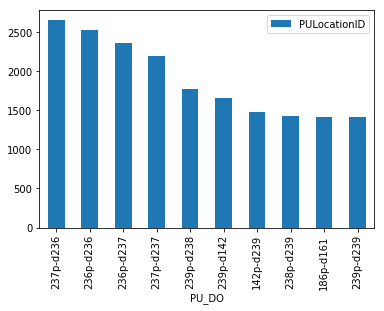

In [92]:
df_clean['PU_DO'] = df_clean["PULocationID"].map(str).add('p-d').add(df_clean["DOLocationID"].map(str))

df_pudo = df_clean.groupby(['PU_DO']).count()
df_pudo = df_pudo[['PULocationID']]
df_pudo = df_pudo.sort_values(by='PULocationID', ascending=False)

df_pudo[0:10].plot.bar()

<h2>Upper East Side in Manhattan</h2>

The most common trips involve zones 236 and 237. There are the codes respectivelu for 236 is the code respectively for Upper East Side North and Upper East Side South in Manhattan.

Upper East Side, according to Wikipedia, is one of the most affluent neighborhoods in New York. It is full of offices, libraries but also full of attractions, like museums (Guggenheim above all) consulates.

Seems that in the Upper East Side, it's common to take the cab for very short trips.

<h2>Upper West Side and Lincoln Square</h2>

Zones 238 and 239 refers to the Upper West Side, in Manhattan. This borough is geographically very close to the Upper East Side (it's just on the other side of Central Park).

Also, a lot of trips are between Upper West Side and Lincoln Square (142). There two neighborhoods are adiacent, and reflect the same behaviour of the Upper East Side, but with less volumes.

<h2>Midtown</h2>

Also in the top 10, there are trips between Upper East Side and Midtown (161 and 162). Midtown is right in the south of the Upper East Side, and it's something more than a short walk distance.

Midtown combines work activities and touristic activities. It is the neighborhood of the skyscrapers, but also Time Square, Madison Square Garden and Plaza Hotel, very touristic points of interest.

<h2>Conclusions</h2>

In the end, trips starting and ending in Manhattan are the most common. Appears that the taxi is cheap enough to cover also small distances. This conclusion could be already reached comparing the 'trip_distance' mean values of the various boroughs, Mahattan has the lowest one indeed (mean: 2.33, sts: 2,62).

Let's remember we removed all the trips lasting less than 60 seconds. After this last analysis, we can say that probably was not a good idea referring to Manhattan. A specific analysis on this borough could lead to different cleaning actions.